# QuanTUK QC-Education Package Introdution 
## Import
Use below statement to import the Quantuk QC-Education Package simulator to Your Python project.

In [1]:
!pip3 install --quiet git+https://github.com/QuanTUK/QC-Education-Package.git  

  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/QuanTUK/QC-Education-Package.git /tmp/pip-req-build-8jcjzrwt did not run successfully.
  │ exit code: 128
  ╰─> [1 lines of output]
      fatal: konnte nicht auf 'https://github.com/QuanTUK/QC-Education-Package.git/' zugreifen: Could not resolve host: github.com
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/QuanTUK/QC-Education-Package.git /tmp/pip-req-build-8jcjzrwt did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Restart the kernel after installing the package.**

In [2]:

from qc_education_package import Simulator, CircleNotation, DimensionalCircleNotation

## Using the package
### Initializing a simulator 
After importing the simulator can be initialized with the desired number of qubits.

Although one can choose any number of qubits, it highly recommended to not use more than 10 qubits as complexity grows exponential ($\Omega (2^n)$)

In [3]:
n = 3  # No. of qubits
sim = Simulator(n)  # Create a quantum computer simulator object


### Setting up a Visualizer
To set up a visualizer one can simply pass the simulator object to the visualization class of choice.
Here we choose the Dimensional Circle Notation (DCN) as a visualization.  

Other visualization methods as Circle Notation are available, too.
All visualization methods interchangeable as they provide the same set of methods.

In [4]:
vis = CircleNotation(sim)
vis = DimensionalCircleNotation(sim)

### Preparing qubits or quantum register
By default all qubits in a simulator instance are $|0\rangle$.
In this example having a simulator with three qubits we start in the state $|0_30_20_1\rangle := |0\rangle_3 \otimes |0\rangle_2 \otimes|0_1\rangle$, where we differentiate the qubits by using an index. 

At this point it is mandatory to define some **notational standards**. In the visualizations used in this package the bitorder resp. qubit order is such that the LSB is on the right-hand side. It is important to keep this in mind as we use a shorthand notation without above indices $|000\rangle$. 

Lets visualize the current state of the simulator using ```vis.show()``` to verify it is indeed $|000\rangle$.

3 qubit - Scaling text by 1.00
Show


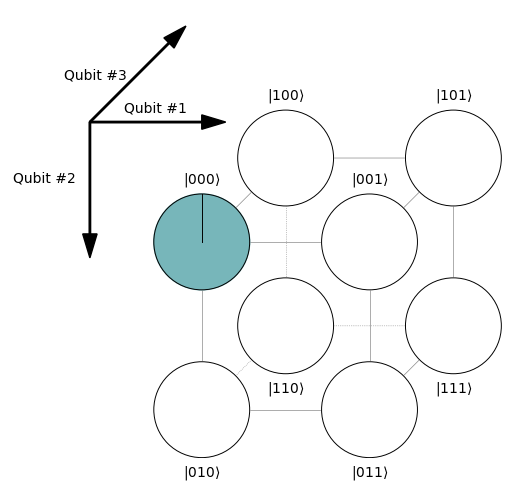

In [5]:
vis.show()

With N qubits one can represent $2^N$ numbers in binary. 
With ```sim.writer(integer)``` we can write a value from 0 to $2^N$
In below examples ```sim.writer(1)``` will reset the simulator state to $|0_30_21_1\rangle$

In [6]:
# Write integer to 
sim.write(1)  # qubit level

# Visualize new state
vis.export_png('test.png')

At any point one can reset the simulator to state $|000\rangle$ by using ```sim.reset()```.
Moreover it is possible to change the number of qubits by passing a value.

2 qubit - Scaling text by 1.25
Show


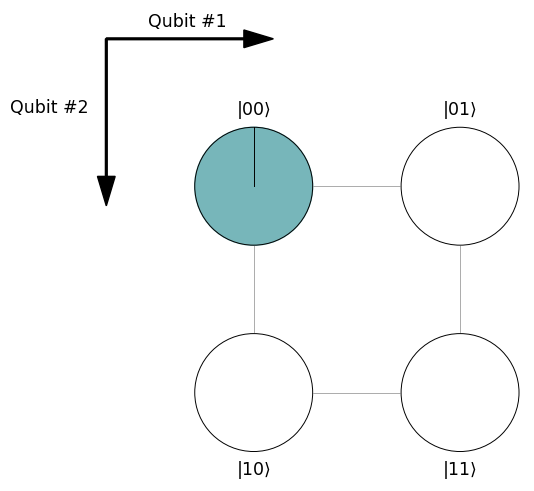

In [7]:
sim.reset(2)
vis = DimensionalCircleNotation(sim)
vis.show()

For the next steps a simulator with more qubits is suitable. So we reset once again, to get a three qubit simulator

3 qubit - Scaling text by 1.00
Show


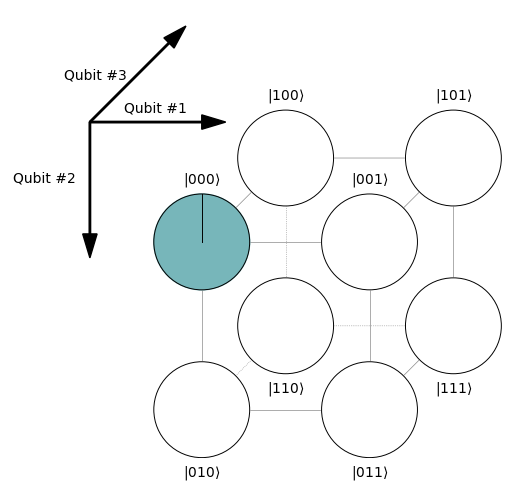

In [8]:
sim.reset(3)

vis = DimensionalCircleNotation(sim)
vis.show()

### Single qubit operations
All operations/gates expect an integer value as number of the qubit. Currently we are using a simulator with three qubits. Hence we can pass the values 1,2 or 3.
For example we can use the hadamard gate on qubit 1.

Check the [Cheat-Sheet](cheat-sheet.ipynb) for a list of all available quantum gates.

In [9]:
sim.had(1)

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
        -0.        +0.j,  0.        +0.j, -0.        +0.j,
         0.        +0.j, -0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j, -0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j, -0.        +0.j,
         0.        +0.j, -0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j, -0.        +0.j,  0.        +0.j,
        -0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j, -0.        +0.j],
       [ 0.        +0.j,  0.      

### Get Matrix representation of any Operator
The simulator always returns the matrix representation of the applied gate (as numpy array). 
As in Jupyter notebooks the return of the last operation is printed, we get a (quite messy) matrix representation for the hadamard gate on the first qubit.

One can suppress this behaviour by adding a semicolon assigning the value to a variable 

In [10]:
sim.had(1);

In [11]:
had1 = sim.had(1)

But one  can also use this information to understand how multi qubit operations can be built using single qubit operatos and the kronecker product. E.g. students can compute multi qubit gates for two or three qubits as exercise task and check their results by printing those matrices.
Notice that the output with print is already better structured than above.

In [12]:
print(had1)

[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j -0.        +0.j
   0.        +0.j -0.        +0.j  0.        +0.j -0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j -0.        +0.j  0.70710678+0.j -0.70710678+0.j
   0.        +0.j -0.        +0.j  0.        +0.j -0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j -0.        +0.j  0.        +0.j -0.        +0.j
   0.70710678+0.j -0.70710678+0.j  0.        +0.j -0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.        +0.j -0.        +0.j  0.        +0.j -0.        +0.j
   

Sometimes printing a numpy array leads to hard to read output, especially when complex values are involved. Legibility can be improved by using numpy methods to format the output. 
One can see this clearly by comparing the output of the code below.

In [13]:
# format output using numpy
import numpy as np 
nice = np.array2string(np.real(had1), precision=3,  sign='+') # show only real par, since imag is always 0
print(nice)

[[+0.707 +0.707 +0.    +0.    +0.    +0.    +0.    +0.   ]
 [+0.707 -0.707 +0.    -0.    +0.    -0.    +0.    -0.   ]
 [+0.    +0.    +0.707 +0.707 +0.    +0.    +0.    +0.   ]
 [+0.    -0.    +0.707 -0.707 +0.    -0.    +0.    -0.   ]
 [+0.    +0.    +0.    +0.    +0.707 +0.707 +0.    +0.   ]
 [+0.    -0.    +0.    -0.    +0.707 -0.707 +0.    -0.   ]
 [+0.    +0.    +0.    +0.    +0.    +0.    +0.707 +0.707]
 [+0.    -0.    +0.    -0.    +0.    -0.    +0.707 -0.707]]


### Phase gates
Phase gates require an angle in degree as mandatory argument. For all phase operations the angle is always the first argument, followed by the qubit argument.

We prepare a 3-qubit simulator in state $|001\rangle$ and apply the phase gate for a 90 degree angle to qubit 1.

Check the [Cheat-Sheet](cheat-sheet.ipynb) for a list of all available quantum phase gates.

In [14]:
sim.write(1)  # Prepare state |001>
sim.phase(90, 1)  # Apply Phase-90 to qubit 1
vis.show()  # Show the result

Show


### Multi qubit operations
Of course quantum computing gets more and more exciting as we operate on more than one qubit.
Every single qubit operation can be applied to multiple qubits.

To do so simply pass a list of integers resp. the qubits a gate shall be applied to. We use the NOT-Gate to explore this


Check the [Cheat-Sheet](cheat-sheet.ipynb) for a list of all available quantum gates.

In [15]:
mat = sim.qnot([1,2])

Here checking the matrix representation of multi qubit gates can become a good learning task e.g. to spot patterns 

In [16]:
not12 = np.array2string(np.real(mat), precision=1, sign='+') # show only real par, since imag is always 0
print(not12)

[[+0. +0. +0. +1. +0. +0. +0. +0.]
 [+0. +0. +1. +0. +0. +0. +0. +0.]
 [+0. +1. +0. +0. +0. +0. +0. +0.]
 [+1. +0. +0. +0. +0. +0. +0. +0.]
 [+0. +0. +0. +0. +0. +0. +0. +1.]
 [+0. +0. +0. +0. +0. +0. +1. +0.]
 [+0. +0. +0. +0. +0. +1. +0. +0.]
 [+0. +0. +0. +0. +1. +0. +0. +0.]]


If no argument is passed, the quantum gate will be applied to all gates. In this examples ```sim.qnot([1,2,3])``` and ```sim.qnot()``` are equivalent operations.


In [17]:
mat = sim.qnot()
not123 = np.array2string(np.real(mat), precision=1, sign='+') # show only real par, since imag is always 0
print(not123)

[[0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]


### Multi-qubit phase gates
For phase gates angle is always first argument. For the 2nd argument, the qubit(s) which the gate shall be applied to, the same rules as for other gates are valid.
To apply a phase gate on multiple qubits one has to pass a list of integers resp. qubits.

We demonstrate this with the PHASE gate used before and prepare a perfect superposition state using the hadamard gate.

In [18]:
sim.reset()  # Reset to 3 qubit simulator, state |000>
sim.had()  # Apply HAD to all qubits to create superposition
vis.show()

Show


To apply a PHASE-90 operation to qubits 1 and 2

In [19]:
sim.phase(90, [1,2])  # Apply the PHASE-90 gate to qubits 1 and 2
vis.show()

Show


To apply the PHASE-90 to all qubits we omit the 2nd argument.

In [20]:
sim.reset()
sim.had()  # Recreate superposition state
sim.phase(90)  # Apply PHASE-90 to all qubits
vis.show()

Show


### Controlled Gates

There is a controlled operation most of the gates each gate. Each gate excepts one or more controlling qubits and one target qubit.
The Roatation gates also expect an angle in degree

Check the [Cheat-Sheet](cheat-sheet.ipynb) for a list of all available quantum gates.

### SWAP and Controlled-SWAP

Check the [Cheat-Sheet](cheat-sheet.ipynb) for a list of all available quantum gates.

### Measuring/Reading the quantum register

### Creating and exporting visualizations 




In [21]:
vis.export_png('img.png') # 300dpi image
vis.export_pdf('img.pdf')

vis.export_svg('img.svg')  # vector graphics